In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
data_filename = "LAB5 - pre-lab.csv"
raw_data = pd.read_csv(data_filename)
raw_data.columns

Index(['Stress (MPa)', 'Strain rate (1/sec)'], dtype='object')

In [93]:
x_label = "Stress (MPa)"
y_label = "Strain rate (1/sec)"

In [94]:
from scipy.stats import linregress

In [95]:
fit_log = linregress(np.log(raw_data[x_label]), np.log(raw_data[y_label]))
fit_log

LinregressResult(slope=2.458224177285136, intercept=-24.10350822147588, rvalue=0.9564001431892402, pvalue=0.04359985681075984, stderr=0.5308089414431187, intercept_stderr=2.275797557858456)

Text(1.05, 1.0, 'm=2.4582e+00\nB=3.4039e-11')

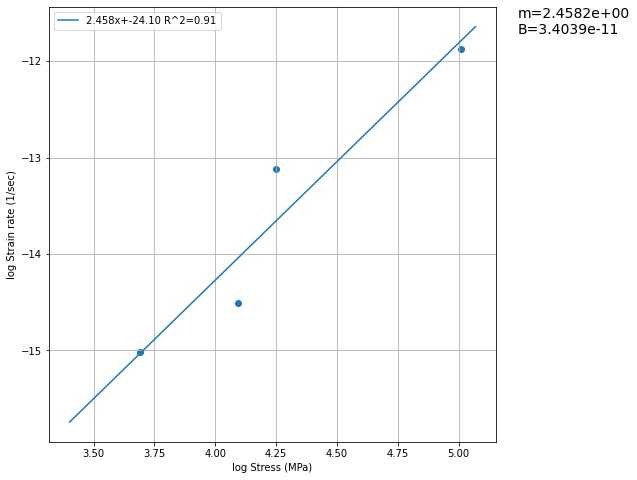

In [96]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(nrows=1, ncols=1)
fake_x_data = np.arange(raw_data[x_label].min()-10, raw_data[x_label].max()+10)
ax.scatter(np.log(raw_data[x_label]), np.log(raw_data[y_label]))
ax.plot(np.log(fake_x_data), (fit_log.slope*np.log(fake_x_data))+fit_log.intercept, label=f"{fit_log.slope:.3f}x+{fit_log.intercept:.2f} R^2={fit_log.rvalue**2:.2f}")
ax.set_xlabel("log " + x_label)
ax.set_ylabel("log " + y_label)
ax.grid()
ax.legend()
text_str = f"""m={fit_log.slope:.4e}
B={np.exp(fit_log.intercept):.4e}"""
ax.text(1.05, 1.0, text_str, transform=ax.transAxes, fontsize=14, verticalalignment='top')

In [97]:
data_filename = "LAB5 - data.csv"
lab_data = pd.read_csv(data_filename)
lab_data.columns

Index(['Time [min]', 'Elongation [mm]', 'Strain [mm/mm]', 'μStrain [mm/mm]'], dtype='object')

In [98]:
x_label = "Time [min]"
y_label = "Strain [mm/mm]"

Text(1.05, 1.0, 'Load=467N\nStress=11.3MPa')

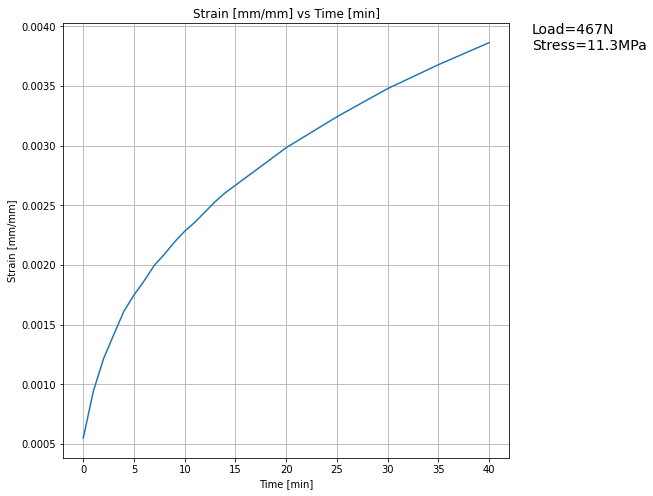

In [99]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(nrows=1, ncols=1)
ax.plot(lab_data[x_label], lab_data[y_label])
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.grid()
ax.set_title(y_label + " vs " + x_label)
text_str = f"""Load=467N
Stress=11.3MPa"""
ax.text(1.05, 1.0, text_str, transform=ax.transAxes, fontsize=14, verticalalignment='top')

In [100]:
# fit linear to second region
start_point = 16
end_point = 21
fit_lin = linregress(lab_data[x_label].iloc[start_point:end_point], lab_data[y_label].iloc[start_point:end_point])
fit_lin

LinregressResult(slope=4.394654089999999e-05, intercept=0.0021312893076, rvalue=0.9974639254742881, pvalue=0.0001532539212931728, stderr=1.8104533954399145e-06, intercept_stderr=5.5801921312862694e-05)

In [101]:
data_filename = "LAB5 - group.csv"
group_data = pd.read_csv(data_filename)
group_data.columns

Index(['Stress (MPa)', 'Strain rate (με/min)'], dtype='object')

In [102]:
x_label = "Stress (MPa)"
y_label = "Strain rate (με/min)"

In [103]:
fit_log = linregress(np.log(group_data[x_label]), np.log(group_data[y_label]))
fit_log

LinregressResult(slope=1.0534961305281016, intercept=1.3319389021991612, rvalue=0.9218009758283594, pvalue=0.07819902417164058, stderr=0.3132821531745861, intercept_stderr=0.7828509734386989)

In [104]:
np.exp(fit_log.slope*np.log(15.986)+fit_log.intercept)

70.24071860499942

Text(1.05, 1.0, 'm=1.0535e+00\nB=3.7884e+00')

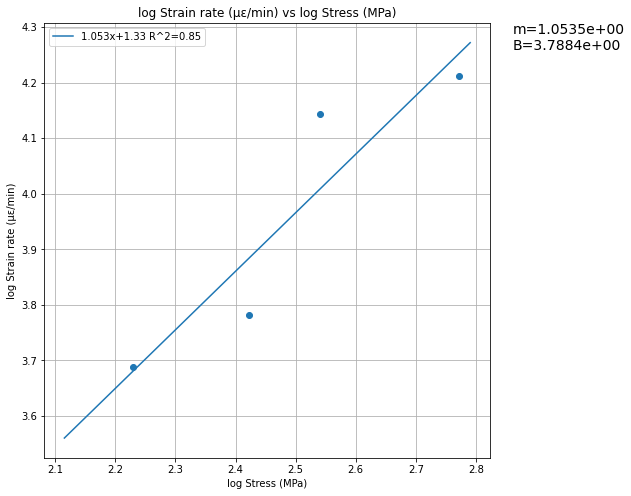

In [106]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(nrows=1, ncols=1)
fake_x_data = np.arange(group_data[x_label].min()-1, group_data[x_label].max()+1)
ax.scatter(np.log(group_data[x_label]), np.log(group_data[y_label]))
ax.plot(np.log(fake_x_data), (fit_log.slope*np.log(fake_x_data))+fit_log.intercept, label=f"{fit_log.slope:.3f}x+{fit_log.intercept:.2f} R^2={fit_log.rvalue**2:.2f}")
ax.set_xlabel("log " + x_label)
ax.set_ylabel("log " + y_label)
ax.set_title("log " + y_label + " vs " + "log " + x_label)
ax.grid()
ax.legend()
text_str = f"""m={fit_log.slope:.4e}
B={np.exp(fit_log.intercept):.4e}"""
ax.text(1.05, 1.0, text_str, transform=ax.transAxes, fontsize=14, verticalalignment='top')
